Had trouble getting zip function to work.... learned it can be called as such (much easier to run!!!)

In [ ]:
a = [[1,2,3],[4,5,6]]

zipped = list(zip(*a))
x,y, z = zipped

Reading in Warriors Rockets October $17^{th}$ 2017

In [1]:
import json
import numpy as np

In [2]:
reader = open('warriors_game1.json')
game1 = json.load(reader)

In [3]:
swaggyP = game1['2017/10/17/HOUGSW/']['homeplayers']['NickYoung']

In [4]:
dx = np.subtract(swaggyP['x'][2:], swaggyP['x'][:-2])
dy = np.subtract(swaggyP['y'][2:], swaggyP['y'][:-2])


dist = np.sqrt(dx**2 + dy**2)

In [ ]:
dist[0:20]

work on running average of position to 'smooth' out the points

In [5]:
x = swaggyP['x']
y = swaggyP['y']
time = np.linspace(0,len(x),len(x))*0.04

In [ ]:
from imageio import imread
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,10))
img = imread("court.png")
plt.imshow(img,zorder=0, extent = [-54.5,54.5,-31.3,31.3])

In [6]:
def moving_average(a, n) : #https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [7]:
new_x = moving_average(x,n=5)
new_y = moving_average(y,n=5)
new_time = time[2:-2]

In [9]:
dx = new_x[2:]-new_x[:-2]
dy = new_y[2:]-new_y[:-2]
dist = np.sqrt(np.square(dx)+np.square(dy)) # change in distance is 0.08 seconds apart
velo = dist/0.08
time_velo = new_time[1:-1]

# dx, dy, dist, velo, new_x[0],new_x[2]
# dxx = np.array(x[2:])-np.array(x[:-2])
# dyy = np.array(y[2:])-np.array(y[:-2])
# distt = np.sqrt(np.square(dxx)+np.square(dyy))
# veloo = distt/0.08
# vt = np.linspace(0,len(veloo),len(veloo))*0.04

<IPython.core.display.Javascript object>


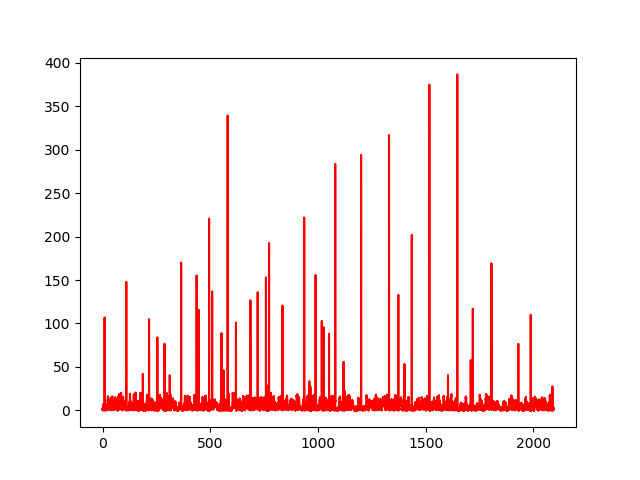

In [34]:
import matplotlib.pylab as plt
%matplotlib notebook
plt.figure()
# plt.plot(vt,veloo,'b')
plt.plot(time_velo,velo,'r')

In [57]:
high_velos = velo[velo>30]
findee = list(velo)
for i in high_velos:
    findee[findee.index(i)] = 0

<IPython.core.display.Javascript object>


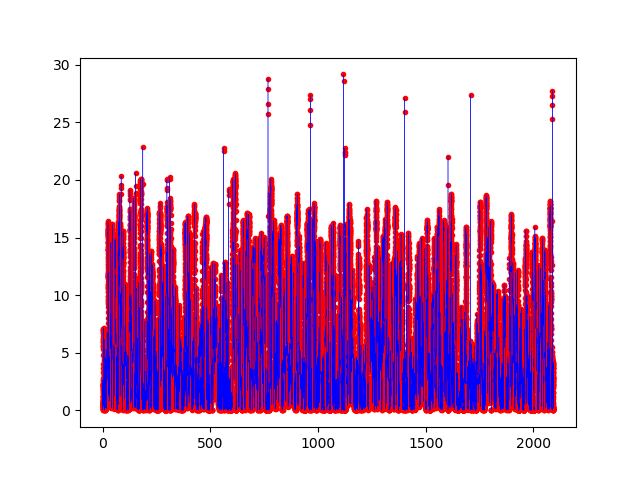

In [68]:
plt.figure()
# plt.plot(vt,veloo,'b')
plt.plot(time_velo,findee,'r.',linewidth=0.3)
plt.plot(time_velo,findee,'b',linewidth=0.3)

In [44]:
new_x[233:245], new_y[233:245], dist[234:245], velo[234:239]

(array([35.548, 35.534, 35.524, 34.906, 34.292, 33.676, 33.066, 32.458,
        32.456, 32.454, 32.448, 32.446]),
 array([13.492, 13.492, 13.494,  9.44 ,  5.336,  1.182, -3.026, -7.284,
        -7.534, -7.778, -8.018, -8.254]),
 array([4.10037657, 8.25050229, 8.34909959, 8.45139752, 8.55316783,
        4.54908386, 0.49401619, 0.48406611, 0.47606722, 0.46603863,
        0.45207079]),
 array([ 51.2547071 , 103.1312786 , 104.3637449 , 105.64246897,
        106.91459793]))

In [55]:
new_y[212:236]

array([13.548, 13.546, 13.542, 13.54 , 13.534, 13.532, 13.526, 13.524,
       13.518, 13.516, 13.514, 13.512, 13.51 , 13.51 , 13.51 , 13.51 ,
       13.508, 13.506, 13.502, 13.498, 13.494, 13.492, 13.492, 13.494])

In [50]:
len(new_x)

52316

In [52]:
for i in range(0,10):
    print(findee[i], findee.index(findee[i]))

2.213170802265308 0
2.6387733892852254 1
2.648702512552158 2
2.142574386106629 3
1.6763054614240724 4
1.2500000000000107 5
0.8173891362135677 6
0.44511234536916894 7
0.3605551275463685 8
0.34731109973618046 9
